In [71]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [72]:
# Path
path=r'/Users/kristenlehtinen/Documents/Careerfoundry/Instacart Basket Analysis'

In [73]:
# Importing ords_prods_cust_merge data 
ords_prods_cust_merge = pd.read_pickle(r'/Users/kristenlehtinen/Documents/Careerfoundry/Instacart Basket Analysis/02 Data/Prepared Data/ords_prods_cust_final.pkl')

# Bar Chart

Text(0, 0.5, 'Number of Orders')

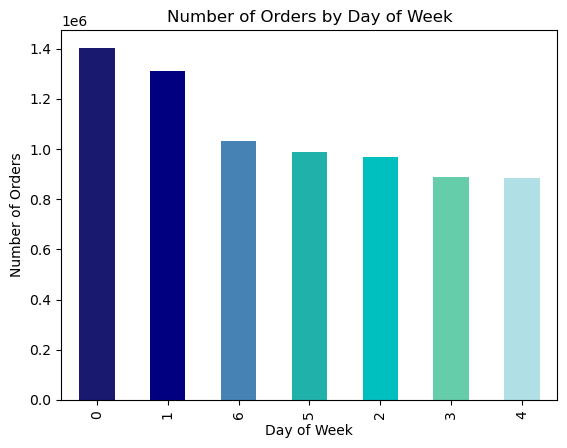

In [74]:
# Bar Chart
bar = ords_prods_cust_merge['orders_day_of_week'].value_counts().plot.bar(color =['midnightblue', 'navy', 'steelblue', 'lightseagreen', 'c', 'mediumaquamarine', 'powderblue'])
# Adding labels and title
plt.title('Number of Orders by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')

In [75]:
# Printing Frequencies
ords_prods_cust_merge['orders_day_of_week'].value_counts().sort_index()

orders_day_of_week
0    1403531
1    1309409
2     968505
3     890160
4     883147
5     986930
6    1031283
Name: count, dtype: int64

In [76]:
#saving bar chart 
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ords_prods_cust_dow_final.png'))

# Histogram

Text(0.5, 1.0, 'Distribution of Product Prices')

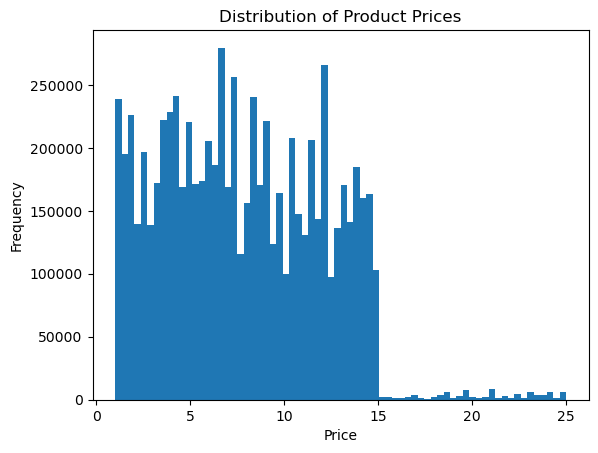

In [77]:
# Histogram
hist=ords_prods_cust_merge['prices'].plot.hist(bins = 70)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Product Prices')

In [78]:
ords_prods_cust_merge['prices'].describe()

count    7.472965e+06
mean     7.789334e+00
std      4.235355e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.120000e+01
max      2.500000e+01
Name: prices, dtype: float64

In [79]:
# Mean price
ords_prods_cust_merge['prices'].mean()

7.789333749699209

In [80]:
# Median price
ords_prods_cust_merge['prices'].median()

7.4

In [81]:
# Max Price
ords_prods_cust_merge['prices'].max()

25.0

# Scatter Plot

<Axes: xlabel='prices', ylabel='prices'>

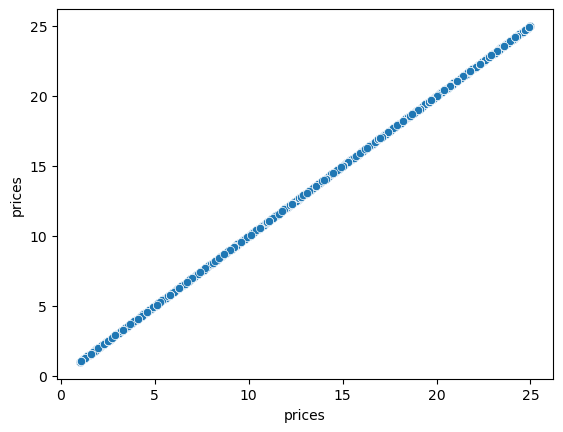

In [82]:
# Scatter plot
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_cust_merge)

In [83]:
# Checking for outlier
ords_prods_cust_merge.loc[ords_prods_cust_merge['prices'] > 100]

,user_id,First Name,Last name,Gender,STATE,Age,date_joined,dependents,fam_status,income,...,busiest_day,Busiest days,busiest_hours,max_order,loyalty_flag,mean_product_price,spending flag,Frequency flag,region,Customer_type


In [84]:
ords_prods_cust_merge.loc[ords_prods_cust_merge['prices'] >100, 'prices'] = np.nan

In [85]:
ords_prods_cust_merge['prices'].max()

25.0

In [86]:
# Saving histogram
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_prices.png'))

# Line Chart

In [87]:
# Create a list holding True/False values to the test np.random.rant()<=0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_cust_merge)) <= 0.7

In [88]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [89]:
np.random.rand(10)

array([0.58140848, 0.88921628, 0.4610853 , 0.28607198, 0.17357196,
       0.54440452, 0.47806828, 0.03560695, 0.64196806, 0.25866468])

In [90]:
# Store 70% of the sample in the dataframe big
big = ords_prods_cust_merge[dev]

In [91]:
# Store 30% of the sample in the dataframe small

small = ords_prods_cust_merge[~dev]

In [92]:
len(ords_prods_cust_merge)

7472965

In [93]:
len(big)+len(small)

7472965

In [94]:
df_2 = small[['orders_day_of_week','prices']]

/Users/kristenlehtinen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kristenlehtinen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Prices')

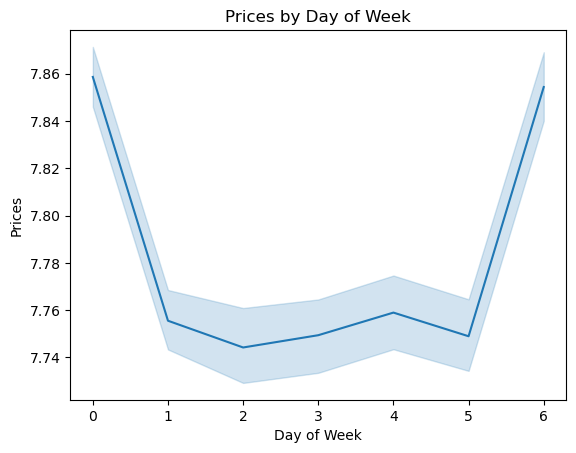

In [95]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')
# Add title and labels
plt.title('Prices by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Prices')

In [96]:
# saving line chart 
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_orders_prices_final.png'))

# Histogram of "order_hour_of_day"

In [97]:
ords_prods_cust_merge.columns

Index(['user_id', 'First Name', 'Last name', 'Gender', 'STATE', 'Age',
       'date_joined', 'dependents', 'fam_status', 'income', 'product_id',
       'product_name', 'aisle_id', 'department_id', 'prices', 'order_id',
       'order_number', 'orders_day_of_week', 'order_time_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered', '_merge',
       'price_range_loc', 'busiest_day', 'Busiest days', 'busiest_hours',
       'max_order', 'loyalty_flag', 'mean_product_price', 'spending flag',
       'Frequency flag', 'region', 'Customer_type'],
      dtype='object')

Text(0, 0.5, 'Frequency')

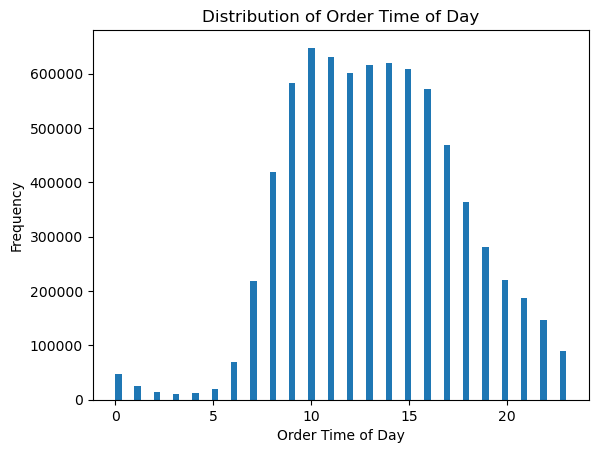

In [98]:
# Histogram
hist=ords_prods_cust_merge['order_time_of_day'].plot.hist(bins = 70)
# Add title and labels
plt.title('Distribution of Order Time of Day')
plt.xlabel('Order Time of Day')
plt.ylabel('Frequency')

#### The historgram shows that the peak hours of orders is 8-16 hours of the day. 

In [99]:
# Saving histogram order_time_of_day
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_time_of_day_final.png'))

# Loyalty_flag bar chart

Text(0.5, 1.0, 'Number of Customers by Loyalty Flag')

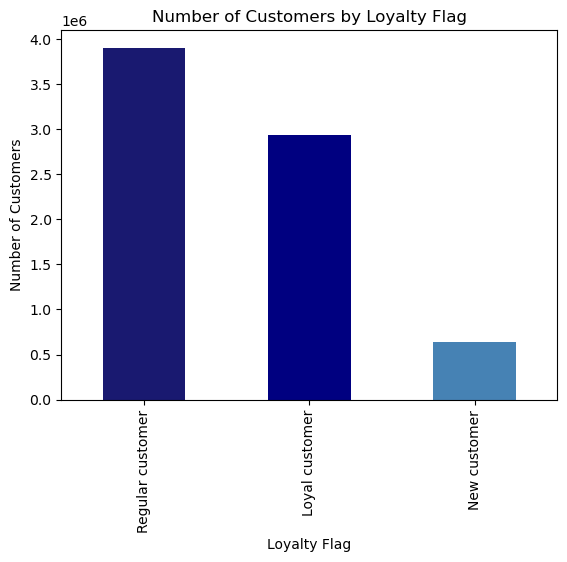

In [100]:
# Bar Chart
bar = ords_prods_cust_merge['loyalty_flag'].value_counts().plot.bar(color =['midnightblue', 'navy', 'steelblue', 'lightseagreen', 'c', 'mediumaquamarine', 'powderblue'])
# Set labels for x and y axes
plt.xlabel('Loyalty Flag')
plt.ylabel('Number of Customers')

# Set the title
plt.title('Number of Customers by Loyalty Flag')

In [101]:
# Printing Frequencies of loyalty_flag
ords_prods_cust_merge['loyalty_flag'].value_counts().sort_index()

loyalty_flag
Loyal customer      2929845
New customer         639231
Regular customer    3903889
Name: count, dtype: int64

In [102]:
# Saving loyalty_flag bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

# Line chart time_of_day and prices

In [103]:
# Create a list holding True/False values to the test np.random.rant()<=0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_cust_merge)) <= 0.7

In [104]:
# Store 70% of the sample in the dataframe big
big = ords_prods_cust_merge[dev]

In [105]:
# Store 30% of the sample in the dataframe small

small = ords_prods_cust_merge[~dev]

In [106]:
len(ords_prods_cust_merge)

7472965

In [107]:
len(big)+len(small)

7472965

In [108]:
df_3 = small[['order_time_of_day','prices']]

/Users/kristenlehtinen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kristenlehtinen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Prices')

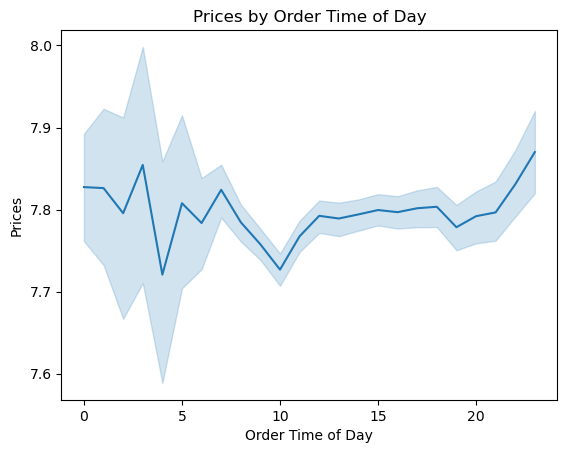

In [109]:
line = sns.lineplot(data = df_3, x = 'order_time_of_day',y = 'prices')
# Add title and labels
plt.title('Prices by Order Time of Day')
plt.xlabel('Order Time of Day')
plt.ylabel('Prices')

#### Prices are more inconsistent/pricier in the early hours and then are consistent through popular hours, 10-20. 

In [110]:
# Saving line chart comparing prices and order_time_of_day
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_orders_time_of_day_final.png'))

In [111]:
# Renaming n_dependants to dependents
ords_prods_cust_merge.rename(columns={'dependants': 'dependents'}, inplace=True)

In [112]:
# Create a list holding True/False values to the test np.random.rant()<=0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_cust_merge)) <= 0.7

In [113]:
# Store 70% of the sample in the dataframe big
big = ords_prods_cust_merge[dev]

In [114]:
# Store 30% of the sample in the dataframe small

small = ords_prods_cust_merge[~dev]

In [115]:
len(ords_prods_cust_merge)

7472965

In [116]:
len(big)+len(small)

7472965

In [117]:
df_4 = small[['Age','dependents']]

/Users/kristenlehtinen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kristenlehtinen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Number of Dependents by Age')

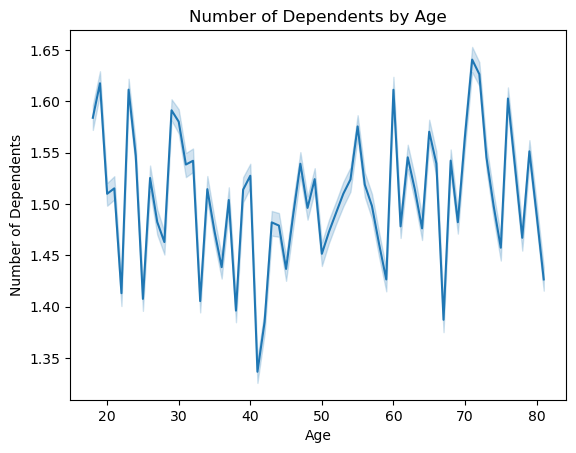

In [118]:
line = sns.lineplot(data = df_4, x = 'Age',y = 'dependents')
plt.xlabel('Age')
plt.ylabel('Number of Dependents')

# Set the title
plt.title('Number of Dependents by Age')

#### It looks like there isn't a relationship between age and dependents. 

In [119]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_dependents.png'))

# Scatter plot age and income

In [120]:
ords_prods_cust_merge['Age'].describe()

count    7.472965e+06
mean     4.941348e+01
std      1.849218e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

In [121]:
scientific_notation_value = 8.100000e+01  # Example scientific notation value
standard_format_value = "{:.10f}".format(scientific_notation_value)
print(standard_format_value)


81.0000000000


In [122]:
# Mean age
ords_prods_cust_merge['Age'].mean()

49.41348340317398

In [123]:
# Median age
ords_prods_cust_merge['Age'].median()

49.0

In [124]:
# Min age
ords_prods_cust_merge['Age'].min()

18

In [125]:
ords_prods_cust_merge['income'].describe()

count    7.472965e+06
mean     9.957837e+04
std      4.416336e+04
min      2.602400e+04
25%      6.686400e+04
50%      9.644200e+04
75%      1.275370e+05
max      5.939010e+05
Name: income, dtype: float64

In [126]:
# Mean income
ords_prods_cust_merge['income'].mean()

99578.36611130924

In [127]:
# Median income
ords_prods_cust_merge['income'].median()

96442.0

In [128]:
# Max income
ords_prods_cust_merge['income'].max()

593901

In [129]:
# Checking for outlier in age
ords_prods_cust_merge.loc[ords_prods_cust_merge['Age'] < 18]

,user_id,First Name,Last name,Gender,STATE,Age,date_joined,dependents,fam_status,income,...,busiest_day,Busiest days,busiest_hours,max_order,loyalty_flag,mean_product_price,spending flag,Frequency flag,region,Customer_type


Text(0.5, 1.0, 'Income vs. Age Scatter Plot')

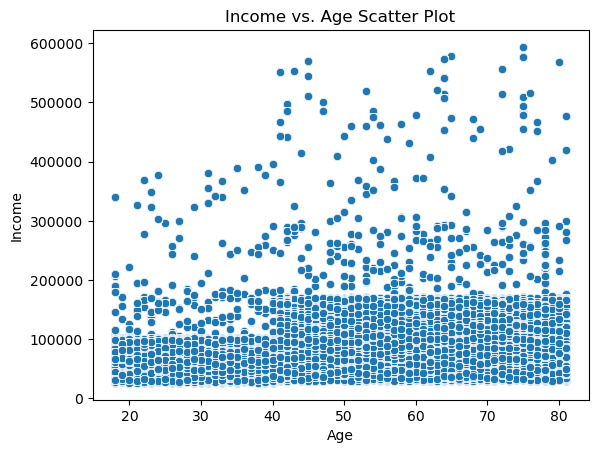

In [130]:
# Scatter plot
sns.scatterplot(x = 'Age', y = 'income',data = ords_prods_cust_merge)
# Set labels for x and y axes
plt.xlabel('Age')
plt.ylabel('Income')

# Set the title
plt.title('Income vs. Age Scatter Plot')

#### The scatter plot comparing age and income shows that customer income is higher as they age. 

In [131]:
# Saving scatterplot 
Scatterplot_age_income = os.path.join(path, '04 Analysis', 'Visualizations', 'scat_age_income.png')
plt.savefig(Scatterplot_age_income)

<Figure size 640x480 with 0 Axes>

In [132]:
crosstab = pd.crosstab(ords_prods_cust_merge['days_since_prior_order'], ords_prods_cust_merge['order_number'], dropna = False)

In [133]:
crosstab.to_clipboard()

In [134]:
# Exporting as pkl file
ords_prods_cust_merge.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merge.pkl'))